# Discovering Maximal Partial Periodic Pattern in Big Data Using Max3PGrowth Algorithm

In this tutorial, we will discuss the first approach to find Maximal Partial Periodic Pattern in big data using Max3PGrowth algorithm.

[__Basic approach:__](#basicApproach) Here, we present the steps to discover Maximal Partial Periodic Pattern using a single minimum support value


***

## <a id='basicApproach'>Basic approach: Executing Max3PGrowth on a single dataset at a particular minimum support value</a>

#### Step 0 : Install latest version of PAMI library

In [1]:
!pip install -U PAMI

#### Step 1: Import the Max3PGrowth algorithm

In [1]:
from PAMI.partialPeriodicPattern.maximal import Max3PGrowth  as alg

#### Step 2: Specify the following input parameters

In [2]:
inputFile = 'https://u-aizu.ac.jp/~udayrage/datasets/temporalDatabases/Temporal_T10I4D100K.csv'
periodCount = 5000
periodicSupportCount = 100
  #Users can also specify this constraint between 0 to 1.

seperator = '\t'       

#### Step 3: Execute the Max3PGrowth algorithm

In [3]:
obj = alg.Max3PGrowth(iFile=inputFile,periodicSupport=periodicSupportCount, period=periodCount, sep=seperator)    #initialize
obj.startMine()            #Start the mining process

Maximal Partial Periodic Frequent patterns were generated successfully using MAX-3PGrowth algorithm 


#### Step 4: Storing the generated patterns

##### Step 4.1: Storing the generated patterns in a file

In [4]:
obj.save(outFile='maximalPatternsMinSupCount100.txt')

##### Step 4.2. Storing the generated patterns in a data frame

In [5]:
frequentPatternsDF= obj.getPatternsAsDataFrame()

#### Step 5: Getting the statistics

##### Step 5.1: Total number of discovered patterns 

In [6]:
print('Total No of patterns: ' + str(len(frequentPatternsDF)))

Total No of patterns: 3948


##### Step 5.2: Runtime consumed by the mining algorithm

In [7]:
print('Runtime: ' + str(obj.getRuntime()))

Runtime: 16.984009981155396


In [8]:
##### Step 5.3: Total Memory consumed by the mining algorithm

In [9]:
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Memory (RSS): 575741952
Memory (USS): 537288704


# Advanced Tutorial on Implementing Max3PGrowth Algorithm

In this tutorial, we will discuss the second approaches to find Maximal Partial Periodic Pattern in big data using Max3PGrowth algorithm.

[__Advanced approach:__](#advApproach) Here, we generalize the basic approach by presenting the steps to discover Maximal Partial Periodic Pattern using multiple minimum support values.

***

#### In this tutorial, we explain how the Max3PGrowth algorithm  can be implemented by varying the minimum support values

#### Step 1: Import the Max3PGrowth algorithm and pandas data frame

In [1]:
from PAMI.partialPeriodicPattern.maximal import Max3PGrowth  as alg
import pandas as pd

#### Step 2: Specify the following input parameters

In [2]:
inputFile = 'https://u-aizu.ac.jp/~udayrage/datasets/temporalDatabases/Temporal_T10I4D100K.csv'
seperator='\t'
periodCount=5000
periodicSupportCountList = [100,150,200,250,300]
#minimumSupport can also specified between 0 to 1. E.g., minSupList = [0.005, 0.006, 0.007, 0.008, 0.009]

result = pd.DataFrame(columns=['algorithm', 'minSup', 'period','patterns', 'runtime', 'memory'])
#initialize a data frame to store the results of Max3PGrowth algorithm

#### Step 3: Execute the Max3PGrowth algorithm using a for loop

In [3]:
algorithm = 'Max3PGrowth'  #specify the algorithm name
for periodicSupportCount in periodicSupportCountList:
    obj = alg.Max3PGrowth('https://u-aizu.ac.jp/~udayrage/datasets/temporalDatabases/Temporal_T10I4D100K.csv', periodicSupport=periodicSupportCount, period=periodCount, sep=seperator)
    obj.startMine()
    #store the results in the data frame
    result.loc[result.shape[0]] = [algorithm, periodicSupportCount,periodCount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]
    print(result)

Maximal Partial Periodic Frequent patterns were generated successfully using MAX-3PGrowth algorithm 
     algorithm  minSup  period  patterns    runtime     memory
0  Max3PGrowth     100    5000      3948  12.557413  576253952
Maximal Partial Periodic Frequent patterns were generated successfully using MAX-3PGrowth algorithm 
     algorithm  minSup  period  patterns    runtime     memory
0  Max3PGrowth     100    5000      3948  12.557413  576253952
1  Max3PGrowth     150    5000         0  11.779701  574746624
Maximal Partial Periodic Frequent patterns were generated successfully using MAX-3PGrowth algorithm 
     algorithm  minSup  period  patterns    runtime     memory
0  Max3PGrowth     100    5000      3948  12.557413  576253952
1  Max3PGrowth     150    5000         0  11.779701  574746624
2  Max3PGrowth     200    5000         0  10.961705  572588032
Maximal Partial Periodic Frequent patterns were generated successfully using MAX-3PGrowth algorithm 
     algorithm  minSup  perio

#### Step 5: Visualizing the results

##### Step 5.1 Importing the plot library

In [4]:
from PAMI.extras.graph import plotLineGraphsFromDataFrame as plt

##### Step 5.2. Plotting the number of patterns

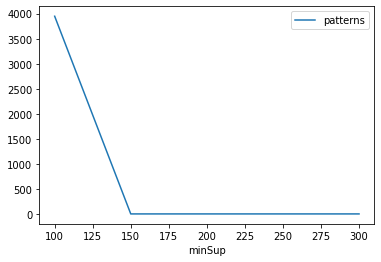

Graph for No Of Patterns is successfully generated!


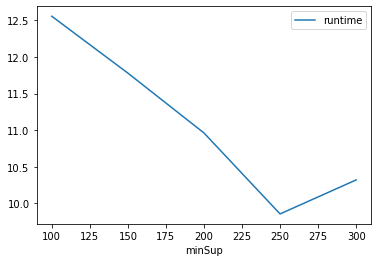

Graph for Runtime taken is successfully generated!


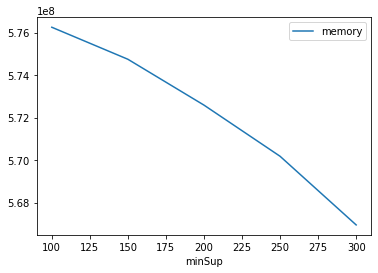

Graph for memory consumption is successfully generated!


In [5]:
ab = plt.plotGraphsFromDataFrame(result)
ab.plotGraphsFromDataFrame() #drawPlots()

### Step 6: Saving the results as latex files

In [6]:
from PAMI.extras.graph import generateLatexFileFromDataFrame as gdf
gdf.generateLatexCode(result)

Latex files generated successfully
